# Comparative analysis between Differential Evolution Clustering and Expectation-Maximization

In [1]:
import DEC.standard_dec as sdec
import EM.expectation_maximization as em
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
DATA_DIR = "data"
N_ITER = 300

In [3]:
X, y = sdec.load_custom_data(os.path.join(DATA_DIR, '2d-10c.dat'))

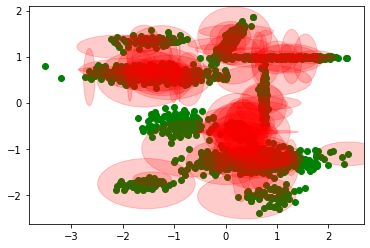

ARI: 0.876904741784828


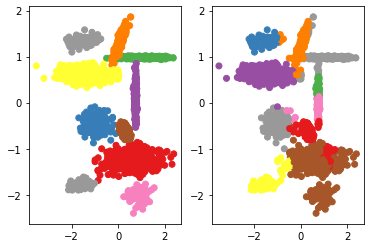

In [4]:
scaler = StandardScaler()

scaler.fit(X)
sdec_preds = sdec.differential_clustering(scaler.transform(X), y, N_ITER, crowding=True, smart_init=False, wait_on_plots=False, verbose=False)

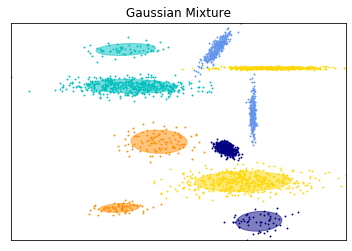

In [5]:
gm = em.gaussian_mixture(X, n_clusters=y.max()+1)
em_preds = gm.predict(X)
em.plot_results(X, em_preds, gm.means_, gm.covariances_, 'Gaussian Mixture')

In [6]:
for alg, predictions in [('EM', em_preds), ('DEC', sdec_preds)]:
    print(f"Homogeneity score - {alg}:", metrics.homogeneity_score(y, predictions))
    print(f"Completeness score - {alg}:", metrics.completeness_score(y, predictions))
    print(f"V score - {alg}:", metrics.completeness_score(y, predictions))
    print(f"ARI - {alg}:", metrics.adjusted_rand_score(y, predictions))
    print("")

Homogeneity score - EM: 0.9976097881518651
Completeness score - EM: 0.9973018371133938
V score - EM: 0.9973018371133938
ARI - EM: 0.9982089084808446

Homogeneity score - DEC: 0.8900945942058953
Completeness score - DEC: 0.8724183141827098
V score - DEC: 0.8724183141827098
ARI - DEC: 0.876904741784828



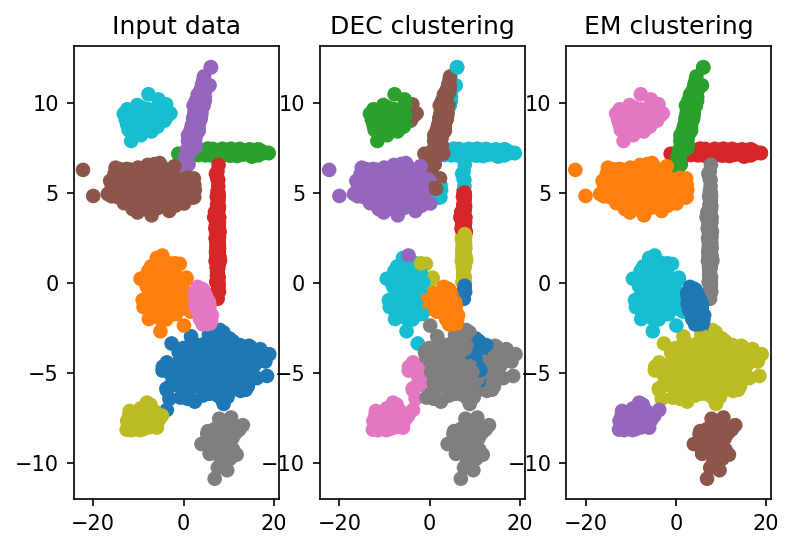

In [28]:
fig, axs = plt.subplots(ncols=3, dpi=150)

axs[0].scatter(X[0], X[1], c=y, cmap='tab10')
axs[0].set_title('Input data')

axs[1].scatter(X[0], X[1], c=sdec_preds, cmap='tab10')
axs[1].set_title('DEC clustering')

axs[2].scatter(X[0], X[1], c=em_preds, cmap='tab10')
axs[2].set_title('EM clustering')

plt.show()
plt.close(fig)